# Quandl And Financial Ratios

This notebook demonstrates downloading adjusted close prices and fundamental financial ratios from Quandl

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools


The tickers file is available on the class website. Unfortunately sector information requires downloading and parsing a CSV file from Quandl

In [3]:
tickers_in_zaks = list(pd.DataFrame.from_csv(
        '/Users/brian/SkyDrive/data/Quandl/Tickers_In_Zaks.csv'
    ).index)
tickers_in_zaks[:5]

['AA', 'AA', 'AABC', 'AAC', 'AAC']


Our usual memoization

In [4]:
@functools.lru_cache(maxsize=1600)
def fetch_quandl(my_data_items, trim_start=None):
    qdata = quandl.get(list(my_data_items), returns="pandas", 
                      trim_start=trim_start,
                      api_key=BrianBoonstraPrivateKeys['Quandl'])
    return qdata

Let's fetch the debt-to-equity ratio (as of the quarterly 10Q report date)

In [6]:
raw_data = fetch_quandl(('ZFB/WOOF_TOT_DEBT_TOT_EQUITY_Q',), trim_start="2001-01-01")


In [7]:
pd.concat((raw_data.head(),raw_data.tail()))

,ZFB/WOOF_TOT_DEBT_TOT_EQUITY_Q - TOT_DEBT_TOT_EQUITY
PER_END_DATE,
2005-03-31,1.5717
2005-06-30,1.8062
2005-09-30,1.5709
2005-12-31,1.4663
2006-03-31,1.2120
2015-12-31,0.6892
2016-03-31,0.7236
2016-06-30,0.8843
2016-09-30,0.8339


In [8]:
def clean_quandl_columns(dataframe):
    replacement_columns = {}
    for c in dataframe.columns:
        series_name, variable = c.split(' - ')
        source_name, asset = series_name.split('/')
        replacement_columns[c] = asset+":"+variable
    renamed_data = dataframe.rename(columns=replacement_columns)
    return renamed_data

In [9]:
eod_spy_data = clean_quandl_columns(fetch_quandl(('EOD/SPY',), trim_start="2004-01-01"))
eod_woof_data = clean_quandl_columns(fetch_quandl(('EOD/WOOF',), trim_start="2004-01-01"))

In [10]:
print(eod_spy_data.columns)
ends = pd.concat((eod_spy_data.head(),eod_spy_data.tail()))
ends[ends.columns[::-1]]

Index(['SPY:Open', 'SPY:High', 'SPY:Low', 'SPY:Close', 'SPY:Volume',
       'SPY:Dividend', 'SPY:Split', 'SPY:Adj_Open', 'SPY:Adj_High',
       'SPY:Adj_Low', 'SPY:Adj_Close', 'SPY:Adj_Volume'],
      dtype='object')


,SPY:Adj_Volume,SPY:Adj_Close,SPY:Adj_Low,SPY:Adj_High,SPY:Adj_Open,SPY:Split,SPY:Dividend,SPY:Volume,SPY:Close,SPY:Low,SPY:High,SPY:Open
Date,,,,,,,,,,,,
2004-01-02,38072300.0,83.837762,83.460896,84.561346,84.222166,1.0,0.0,38072300.0,111.23,110.73,112.19,111.74
2004-01-05,27959800.0,84.744875,84.104238,84.805170,84.179607,1.0,0.0,27959800.0,112.44,111.59,112.52,111.69
2004-01-06,20472800.0,84.829040,84.414504,84.964706,84.535096,1.0,0.0,20472800.0,112.55,112.00,112.73,112.16
2004-01-07,30170400.0,85.118942,84.335060,85.216927,84.711926,1.0,0.0,30170400.0,112.93,111.89,113.06,112.39
2004-01-08,36438400.0,85.455602,84.995839,85.478213,85.357620,1.0,0.0,36438400.0,113.38,112.77,113.41,113.25
2017-04-12,81864436.0,234.030000,233.770000,234.960000,234.740000,1.0,0.0,81864436.0,234.03,233.77,234.96,234.74
2017-04-13,92880394.0,232.510000,232.510000,234.490000,233.640000,1.0,0.0,92880394.0,232.51,232.51,234.49,233.64
2017-04-14,0.0,232.510000,232.510000,232.510000,232.510000,1.0,0.0,0.0,232.51,232.51,232.51,232.51
2017-04-17,68405367.0,234.570000,232.880000,234.570000,233.110000,1.0,0.0,68405367.0,234.57,232.88,234.57,233.11


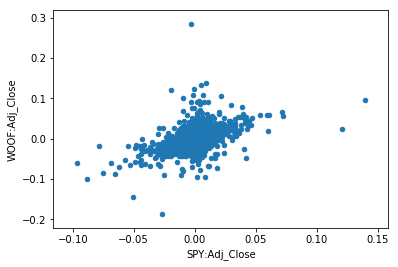

In [11]:
returns=pd.concat(
    [eod_spy_data[['SPY:Adj_Close']], eod_woof_data[['WOOF:Adj_Close']], ]
    , axis=1).pct_change()
returns.plot(x='SPY:Adj_Close', y='WOOF:Adj_Close', kind='scatter')

In [12]:
returns[returns['WOOF:Adj_Close']<-0.15]

,SPY:Adj_Close,WOOF:Adj_Close
Date,,
2008-02-05,-0.026778,-0.186582
